# Upscaling Image Quality and player tracking

In this notebook, we will enhance the quality of an image and try to identify one of the players in the picture.

## Upscaling Image Quality

Here, we have two choices :



*   One could be to use a state-of-the-art Image Upscaling Neural Network and train it with our own data in order to upscale our image. The main issue with this solution is that this will require a GPU and a lot of computing time, not to mention the fact that we will have to create this database, based on thousands of football pictures. This database is hard to make/find and we don't have the material to train these models.

*   The second solution, which seems better and smarter, is to use a pre-trained model, for instance, a pre-trained VGG19, which an artificial network with several CNN layers made for this specific task. With this pre-trained model, we will just load the pre-trained weights without doing anything else. The main issue with that is that we need to find a pre-trained model, which is already hard in computer vision, and that the result will not be perfect since it has not been trained for our specific task.


After weighing the pros and cons, I chose the 2nd solution, which was less expensive and faster.


In [0]:
### INSTALL PACKAGES ###
!pip3 install ISR

### IMPORT PACKAGES ###
import numpy as np
from PIL import Image
from ISR.models import RDN, RRDN

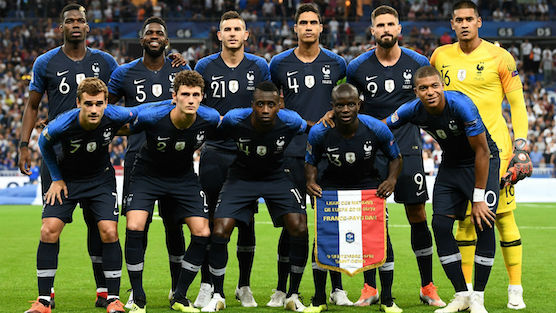

In [29]:
img = Image.open('badQuality.jpeg')
img

In [3]:
#### LOAD THE PRE-TRAINED MODEL ###

#Load it with the adapted configuration

# This model is based on the RDN architecture introduced by Yulun Zhang and trained on DIV2K dataset.
# To get the full explanation of the model : https://arxiv.org/pdf/1812.10477.pdf
model = RDN(weights='noise-cancel')




66076672/66071288 [==============================] - 1s 0us/step


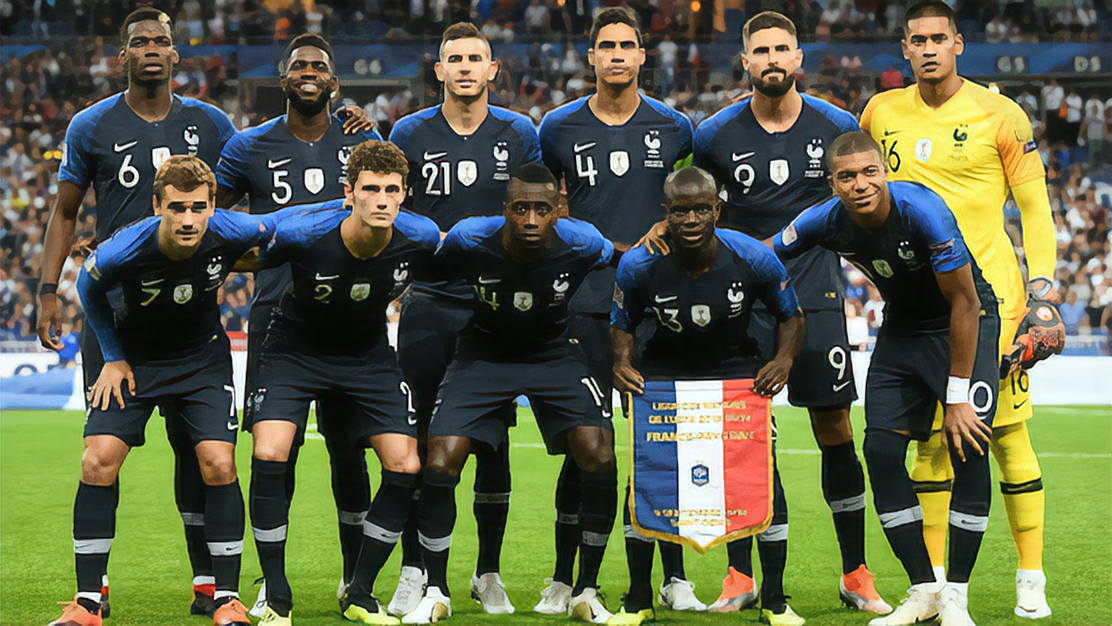

In [30]:
#This calls the model in order to upscale our image
sr_img = model.predict(np.array(img))

#Print the image
sr_img = Image.fromarray(sr_img)
sr_img.save("team_upscale.jpeg")
sr_img

As we can see, the result is not perfect. It's better for the foot of the players than for their face. This is due to the training of the model : this model has been trained on the DIV2K dataset which don't contain many faces or any football pictures. It is difficult for the model to predict something it hasn't seen.

## Face recognition : Find Mbappe

Now, we want to find Mbappe in this upscaled picture. In order to do that, we use a pre-trained face recognition algorithm. In fact, the algorithm detect faces by computing features in the picture and compare the values of these features to validate or not a face.

In [0]:
### INSTALL PACKAGE ###
!pip3 install face_recognition

### IMPORT PACKAGE ###
import face_recognition
from PIL import Image, ImageDraw
import numpy as np

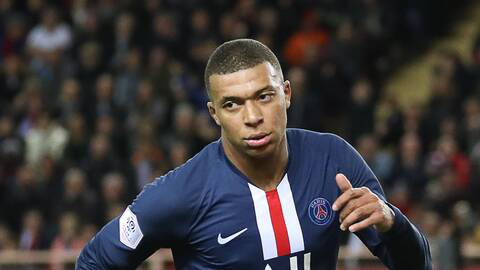

In [32]:
### LOAD ANOTHER PICTURE OF MBAPPE ###

mbappe_pic = Image.open("mbappe_face.jpeg")
mbappe_pic

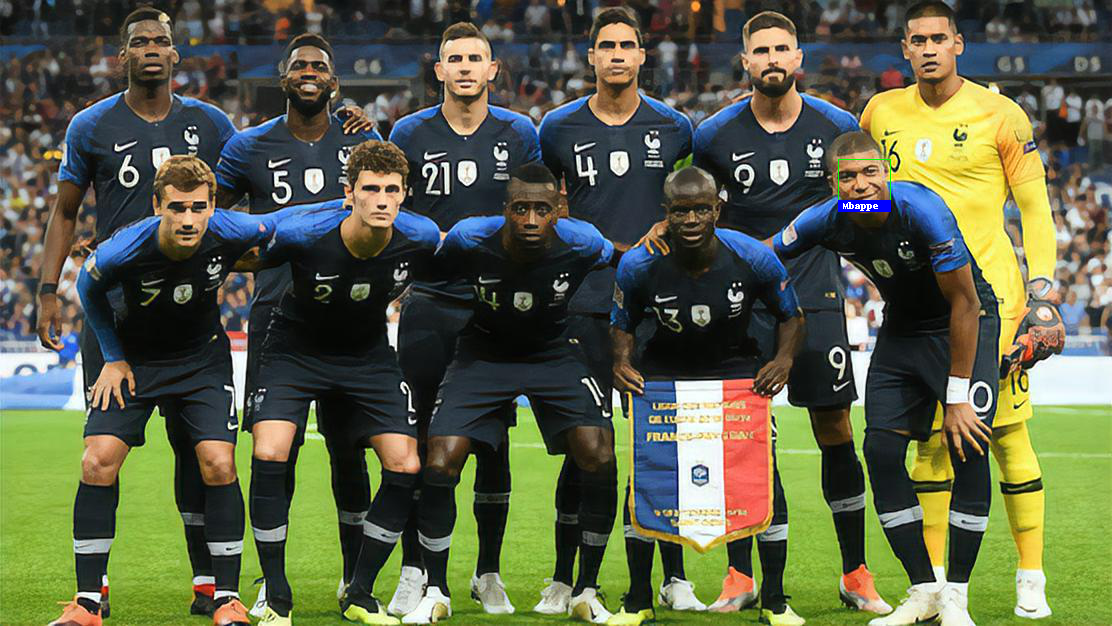

In [33]:
### USE FACE RECOGNITION PYTHON PACKAGE ###

#Encode the face of Mbappe
mbappe_pic = face_recognition.load_image_file("mbappe_face.jpeg")
mbappe_face_encoding = face_recognition.face_encodings(mbappe_pic)[0]


# Load the upscaled image
target_image = face_recognition.load_image_file("team_upscale.jpeg")

# Get all the faces from our upscaled image in order to compare them to the picture of Mbappe
face_locations = face_recognition.face_locations(target_image)
face_encodings = face_recognition.face_encodings(target_image, face_locations)

#Load the image as a ImageDraw to modify it
image = Image.fromarray(target_image)
final_image = ImageDraw.Draw(image)

for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):

    #Match every face with the Mbappe face
    matches = face_recognition.compare_faces([mbappe_face_encoding], face_encoding)
    
    # Find Mbappe as a true match
    if True in matches:

        first_match_index = matches.index(True)
        names = "Mbappe"

        # Draw a rectangle around Mbappe face and put his name
        final_image.rectangle(((left, top), (right, bottom)), outline=(0, 255, 0))
        text_width, text_height = final_image.textsize(names)
        final_image.rectangle(((left, bottom - text_height ), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
        final_image.text((left + 5, bottom - text_height ), names, fill=(255, 255, 255, 255))


# Save and plot the image
pil_image.save("identify_mbappe.jpg")
pil_image

Even if our upscale image wasn't perfect, we were still able to find Mbappe's face in it with this pre-trained face recognition algorithm.